___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.__version__

2023-05-17 21:55:15.531619: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.12.0'

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
#### Groupby geography and count number of entries
df.groupby('Geography').count().reset_index(drop=False)

,Geography,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,France,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014
1,Germany,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509
2,Spain,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477


In [6]:
#### Groupby Surname and count number of entries
df.groupby('Surname').count()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Surname,,,,,,,,,,,,,
Abazu,2,2,2,2,2,2,2,2,2,2,2,2,2
Abbie,1,1,1,1,1,1,1,1,1,1,1,1,1
Abbott,4,4,4,4,4,4,4,4,4,4,4,4,4
Abdullah,1,1,1,1,1,1,1,1,1,1,1,1,1
Abdulov,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zubarev,3,3,3,3,3,3,3,3,3,3,3,3,3
Zubareva,1,1,1,1,1,1,1,1,1,1,1,1,1
Zuev,1,1,1,1,1,1,1,1,1,1,1,1,1


In [7]:
#### Groupby gender and count number of entries
df.groupby('Gender').count()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,,,,,
Female,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543
Male,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457


In [8]:
# for i in df.select_dtypes(include="object").columns:
#     print(df[i].value_counts())
#     print("*****************")

In [9]:
df.groupby('IsActiveMember')['IsActiveMember'].count()

IsActiveMember
0    4849
1    5151
Name: IsActiveMember, dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [11]:
df.IsActiveMember.value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [12]:
# df.Exited.value_counts()
df.groupby('Exited')['Exited'].count()

Exited
0    7963
1    2037
Name: Exited, dtype: int64

In [13]:
# check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
# drop unnesessary columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [15]:
df['Geography'].replace({'Germany':1,'France':2,'Spain':3},inplace=True)

In [16]:
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4339,559,2,Female,43,1,0.000,2,1,1,196645.870,0
5892,588,1,Male,35,3,104356.380,1,1,0,94498.820,0
6545,433,3,Male,27,2,0.000,2,1,1,153698.650,0
3848,560,1,Male,41,4,152532.300,1,0,0,10779.690,0
4808,643,2,Female,33,0,137811.750,1,1,1,184856.890,0
441,790,2,Female,31,9,0.000,2,1,0,84126.750,0
4971,681,3,Male,30,2,128393.290,1,1,1,180593.450,0
8397,630,1,Male,29,6,131354.390,1,0,1,9324.310,1
2591,634,1,Male,38,2,148430.550,1,1,1,56055.720,0
4817,640,2,Male,28,7,0.000,2,1,1,131097.900,0


In [17]:
# Converting categorical values to numeric
# df["geog_germany"] =  df.Geography.apply(lambda x: 1 if x == "Germany" else 0)
# df["geog_spain"] =  df.Geography.apply(lambda x: 1 if x == "Spain" else 0)
# df["geog_france"] =  df.Geography.apply(lambda x: 1 if x == "France" else 0)
### Converting categorical values to numeric
df['Geography'].replace({'Germany':1,'France':2,'Spain':3},inplace=True)


In [18]:
### Converting categorical values to numeric
# df["Gender"] =  df.Gender.apply(lambda x: 1 if x == "Female" else 0)
df['Gender'].replace({'Female':0,'Male':1}, inplace=True)

In [19]:
# check target
df.Exited.value_counts()

# binary classification which means we should use sigmoid act function and 1 neuron in the output layer

Exited
0    7963
1    2037
Name: count, dtype: int64

In [20]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [21]:
# df = df.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12,9]]
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,2,0,42,2,0.000,1,1,1,101348.880,1
1,608,3,0,41,1,83807.860,1,0,1,112542.580,0
2,502,2,0,42,8,159660.800,3,1,0,113931.570,1
3,699,2,0,39,1,0.000,2,0,0,93826.630,0
4,850,3,0,43,2,125510.820,1,1,1,79084.100,0


Exited
0    7963
1    2037
Name: count, dtype: int64

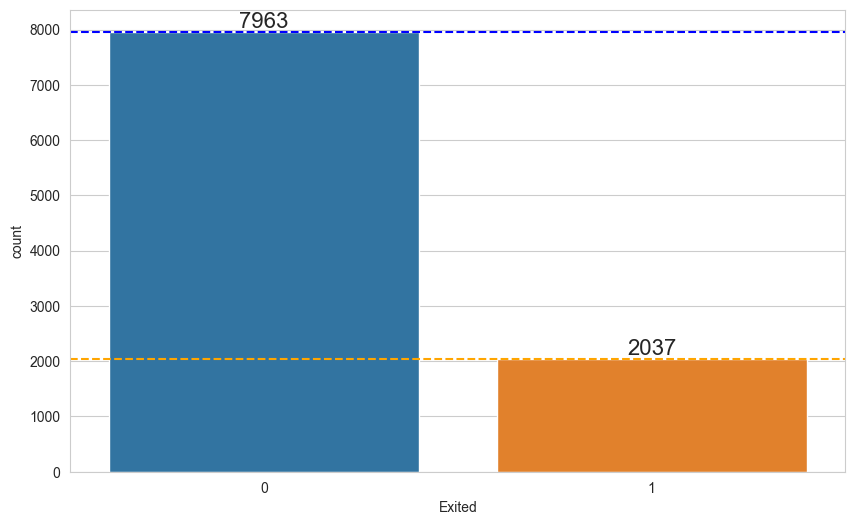

In [22]:
# check class distribution
display(df.Exited.value_counts())
ax = sns.countplot(x=df["Exited"])
ax.bar_label(ax.containers[0], size=16)
plt.axhline(y=df.Exited.value_counts()[1], color='orange', linestyle='--')
plt.axhline(y=df.Exited.value_counts()[0], color='blue', linestyle='--');
# imbalanced

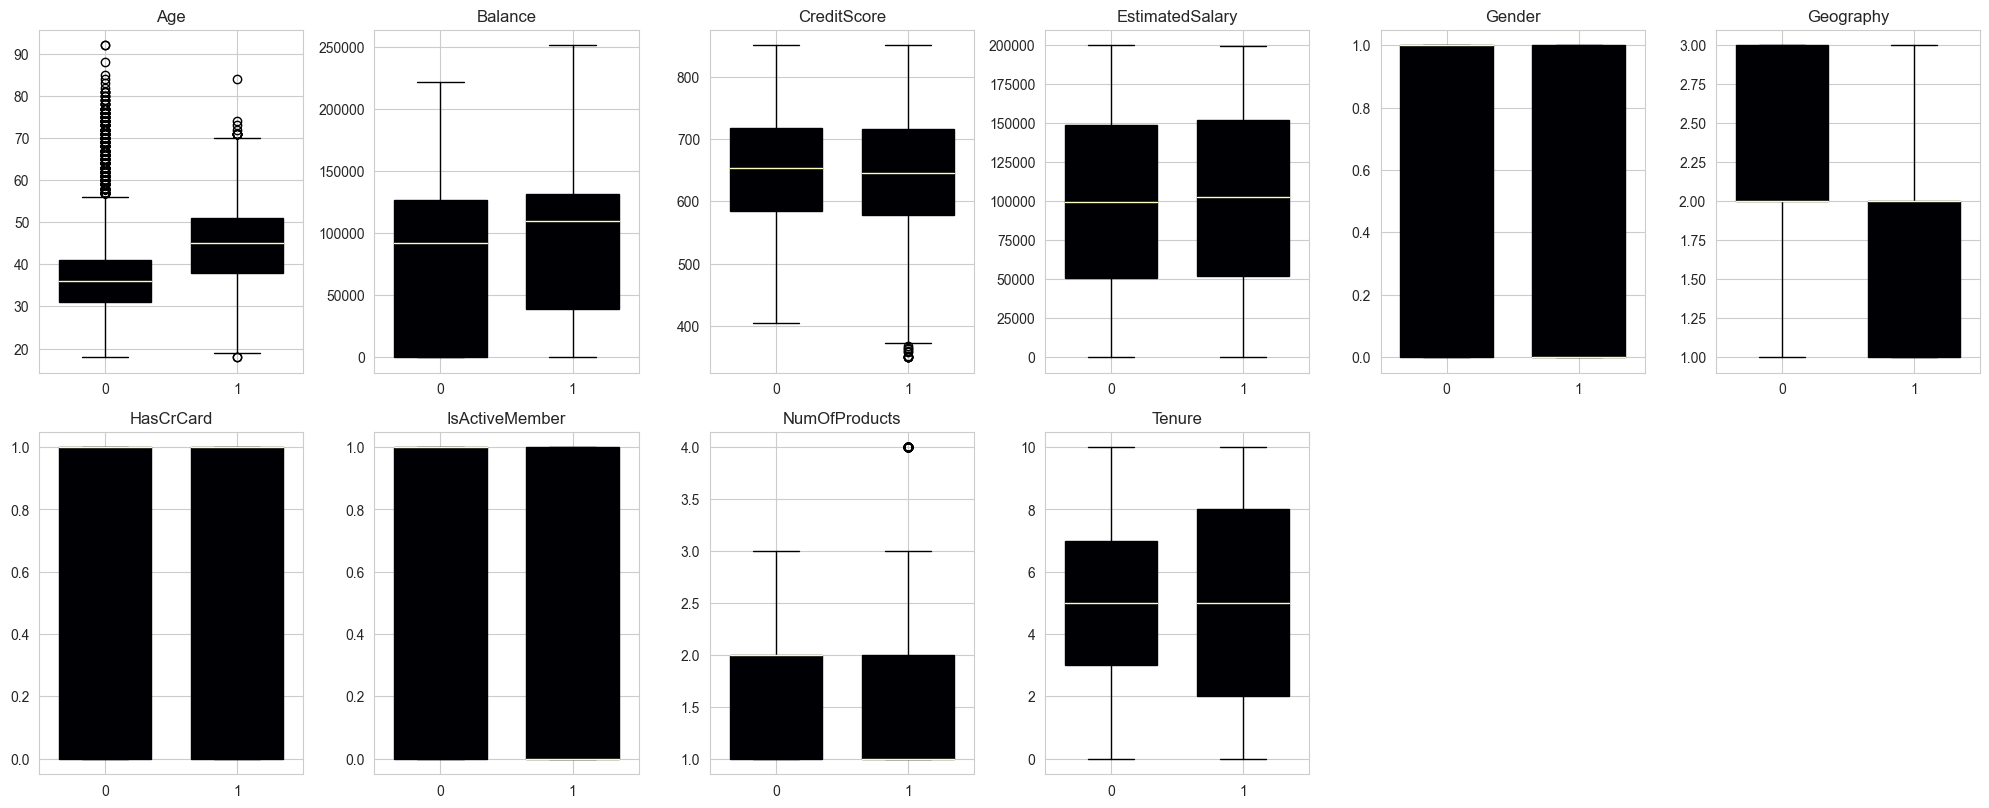

In [23]:
# check outliers with boxplots for target feature

df.plot(kind="box",
        by="Exited", 
        layout=(5, 6), 
        subplots=True, 
        widths=0.7, 
        figsize=(20,20), 
        cmap="magma", 
        patch_artist=True)
plt.tight_layout();

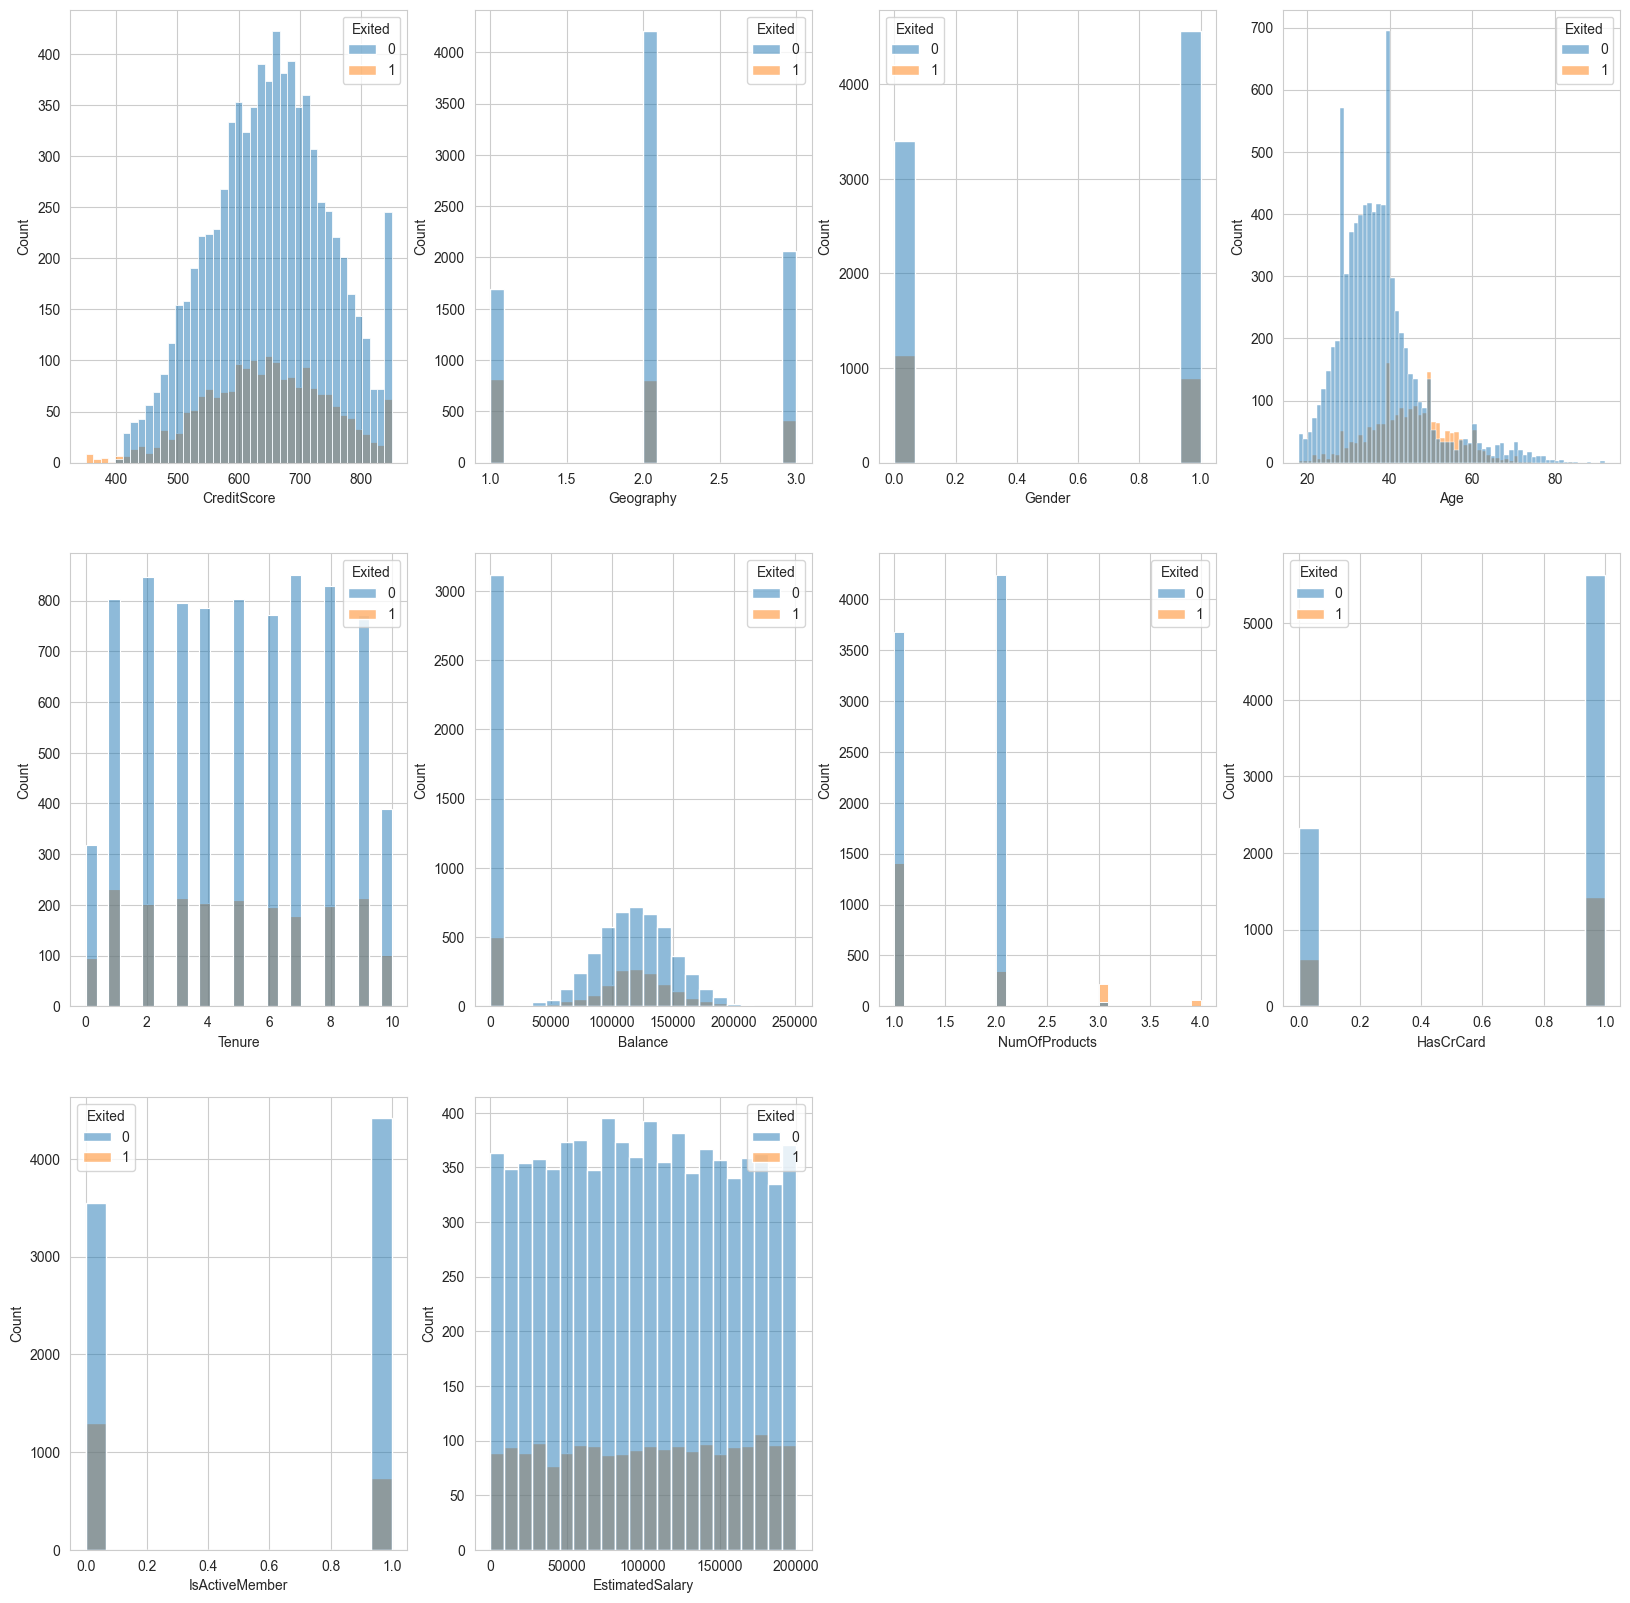

In [24]:
# check corr and heatmap - pair plot

# which features separate the classes better
plt.figure(figsize=(20, 20))
for idx, col in enumerate(df.select_dtypes(include='number').columns[:-1]):
    plt.subplot(3, 4, idx+1)
    sns.histplot(data=df, x=col, hue='Exited')

In [25]:
# corr
df.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000,-0.000,-0.003,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
Geography,-0.000,1.000,0.025,-0.030,0.003,-0.329,0.012,-0.015,0.023,-0.010,-0.139
Gender,-0.003,0.025,1.000,-0.028,0.015,0.012,-0.022,0.006,0.023,-0.008,-0.107
Age,-0.004,-0.030,-0.028,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
Tenure,0.001,0.003,0.015,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
Balance,0.006,-0.329,0.012,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
NumOfProducts,0.012,0.012,-0.022,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
HasCrCard,-0.005,-0.015,0.006,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
IsActiveMember,0.026,0.023,0.023,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
EstimatedSalary,-0.001,-0.010,-0.008,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012


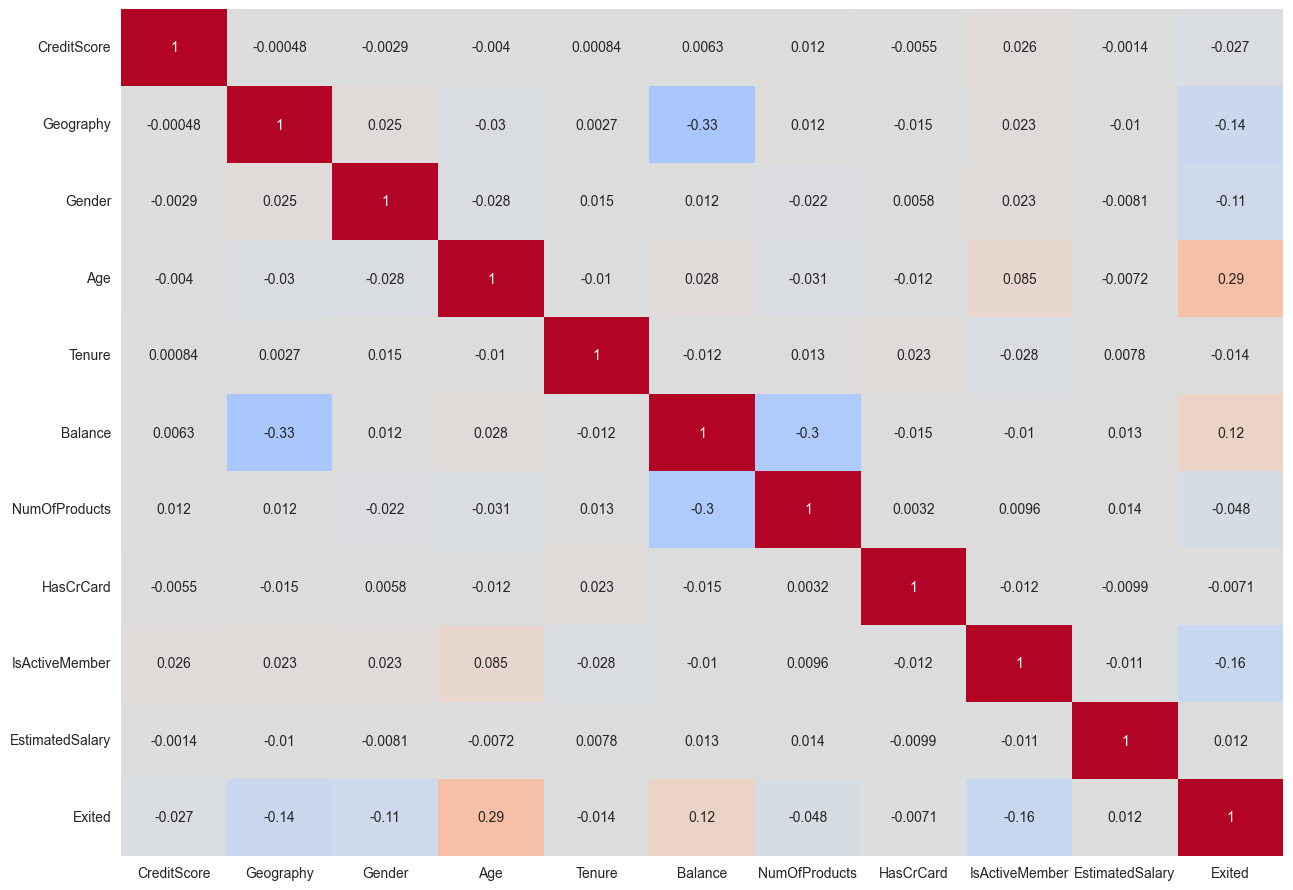

In [26]:
# heatmap
plt.figure(figsize=(15, 11))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm", cbar=False)
plt.show()

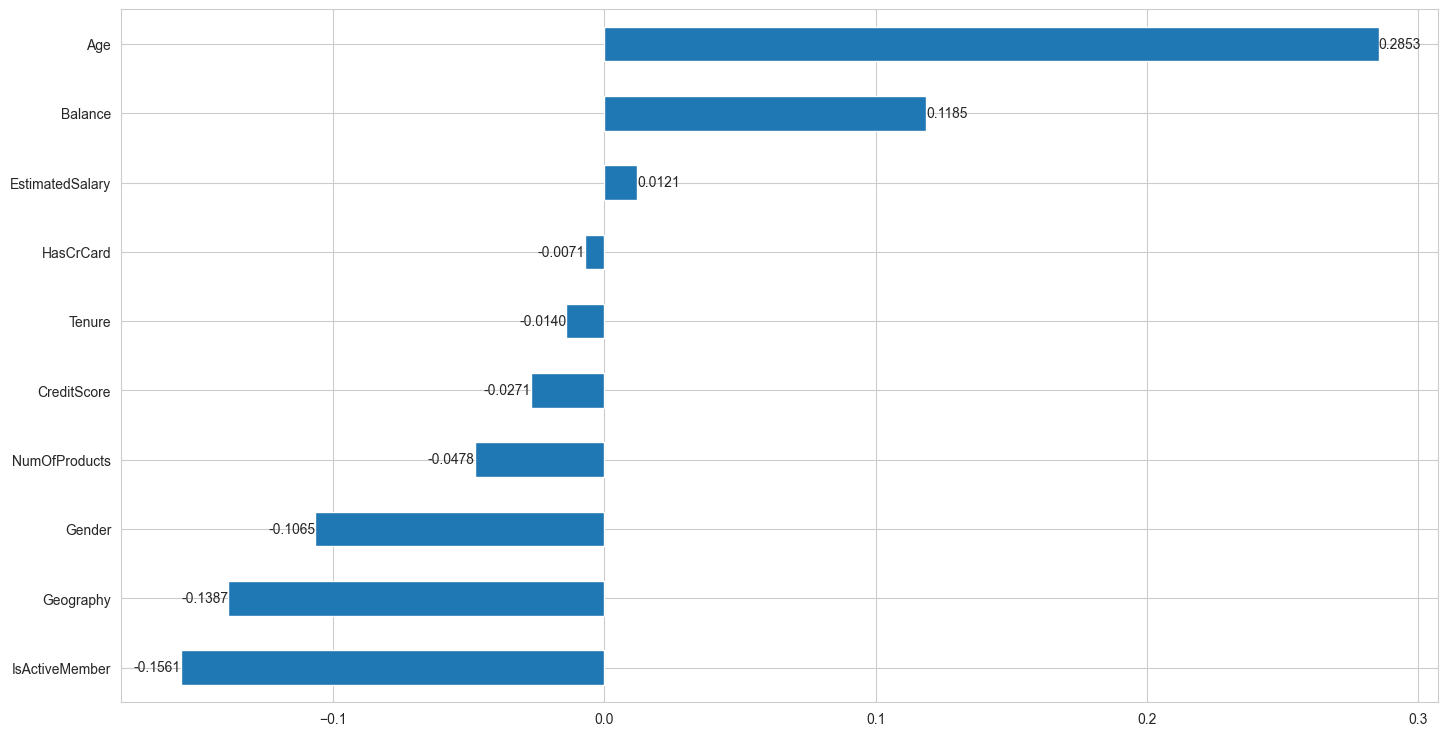

In [27]:
plt.figure(figsize=(17, 9))
ax = df.corr()["Exited"].sort_values().drop("Exited").plot(kind="barh")
ax.bar_label(ax.containers[0], fmt="%.4f")
plt.show()

# Preprocessing of Data
- Train | Test Split, Scalling

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [29]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [30]:
seed = 42

In [31]:
X_train1, X_test, y_train1, y_test = train_test_split(
    X, y, stratify=y, test_size=0.1, random_state=seed 
)

# classların dağılımının oranını göz önünde bulundurarak bu train datasını ve test datasını ayırdık.
# val datayi bu ustte olusturdugumuz train datasi icinden olusturacagiz
X_train, X_val, y_train, y_val = train_test_split(
    X_train1, y_train1, stratify=y_train1, test_size=0.1, random_state=seed 
)


In [32]:
# create the scaler
scaler = MinMaxScaler()

In [33]:
X_train = scaler.fit_transform(X_train) # fit&transform train data
X_val = scaler.transform(X_val) # transform val data
X_test = scaler.transform(X_test) # transform test data

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score

In [35]:
tf.keras.utils.set_random_seed(seed)


model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))


model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                198       
                                                                 
 dense_1 (Dense)             (None, 9)                 171       
                                                                 
 dense_2 (Dense)             (None, 4)                 40        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 414
Trainable params: 414
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(10, 18) dtype=float32, numpy=
 array([[ 0.33161867,  0.15056479, -0.13080841,  0.4166094 , -0.3906395 ,
          0.14103234,  0.43559825, -0.30745363,  0.0220246 ,  0.12105983,
         -0.38290226, -0.04966331,  0.43146336, -0.02745882,  0.00272781,
          0.24595892, -0.44547692, -0.28479993],
        [ 0.01318514, -0.4014127 , -0.42805758,  0.3221544 ,  0.38461155,
         -0.21984449,  0.33286184, -0.34489155, -0.03491694,  0.05806917,
          0.06174469, -0.277596  , -0.2687723 ,  0.45287776, -0.36116892,
         -0.05220395, -0.21748574, -0.35086614],
        [ 0.21584845, -0.29409546,  0.16784728,  0.13926095, -0.42344162,
          0.05891532, -0.15357345, -0.10475951,  0.4208051 , -0.08295897,
          0.02913573, -0.22652993, -0.34920347,  0.19981974,  0.10777813,
          0.00736541, -0.4372075 , -0.35210896],
        [ 0.26977664,  0.33901608, -0.06309479, -0.17242557, -0.4323039 ,
         -0.42708758,  0.23984641,  0.3042402

In [38]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), # x_val, y_val that we assigned before as validation_data
          batch_size=128, 
          epochs=50,
          verbose=1)

Epoch 1/50
64/64 [==============================] - 1s 6ms/step - loss: 0.6983 - accuracy: 0.4912 - val_loss: 0.6735 - val_accuracy: 0.7956
Epoch 2/50
64/64 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.7963 - val_loss: 0.6235 - val_accuracy: 0.7967
Epoch 3/50
64/64 [==============================] - 0s 2ms/step - loss: 0.5595 - accuracy: 0.7963 - val_loss: 0.5023 - val_accuracy: 0.7967
Epoch 4/50
64/64 [==============================] - 0s 2ms/step - loss: 0.4851 - accuracy: 0.7963 - val_loss: 0.4831 - val_accuracy: 0.7967
Epoch 5/50
64/64 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.7970 - val_loss: 0.4738 - val_accuracy: 0.8011
Epoch 6/50
64/64 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.8006 - val_loss: 0.4686 - val_accuracy: 0.7967
Epoch 7/50
64/64 [==============================] - 0s 2ms/step - loss: 0.4524 - accuracy: 0.8057 - val_loss: 0.4648 - val_accuracy: 0.8000
Epoch 8/50
64/64 [==

In [39]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.698,0.491,0.673,0.796
1,0.654,0.796,0.623,0.797
2,0.560,0.796,0.502,0.797
3,0.485,0.796,0.483,0.797
4,0.469,0.797,0.474,0.801


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

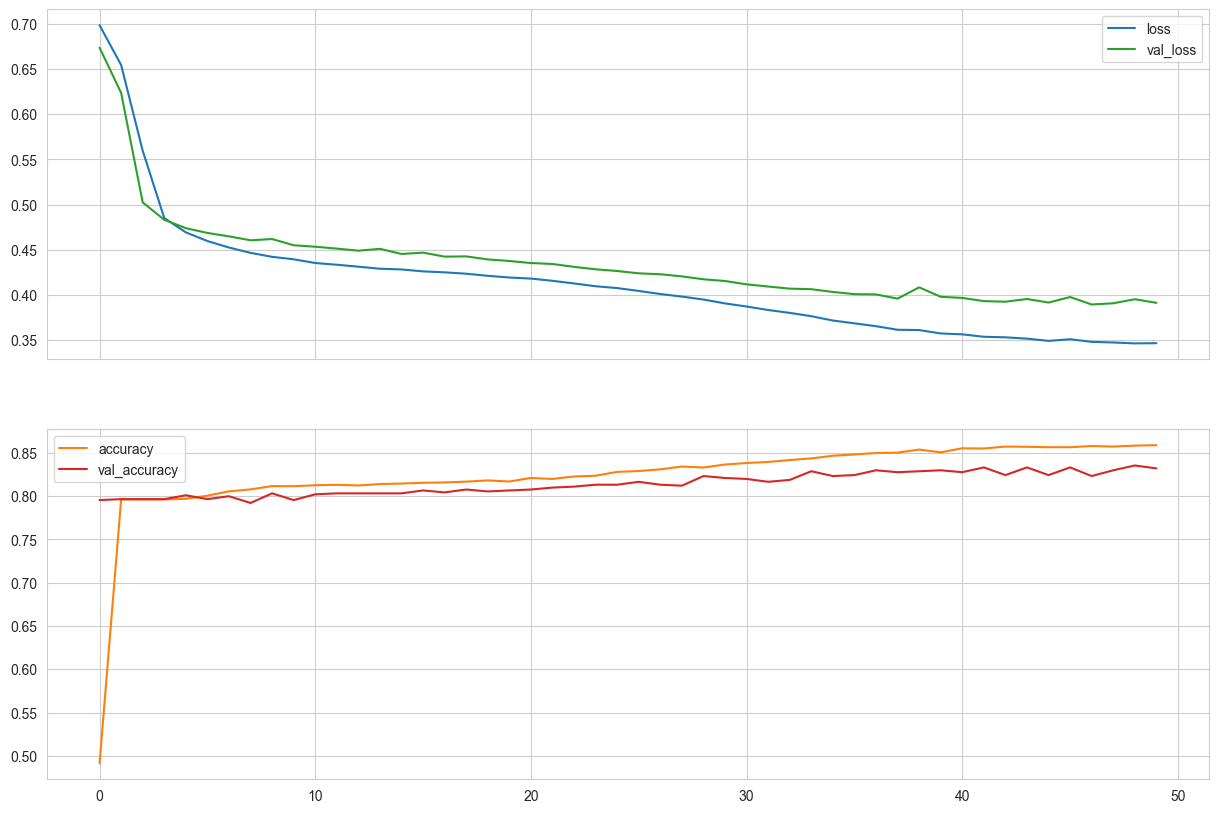

In [40]:
loss_df.plot(subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [41]:
model.evaluate(X_test, y_test, verbose=0)

[0.35867244005203247, 0.8479999899864197]

In [42]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.35867244005203247
accuracy :  0.8479999899864197


In [43]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


# burada predict doğrudan çalışmıyor bize olasılıklar döndürdüğü için 0.5'den yukarıda olanları 1 classına ataması için
# model.predict(X_test) > 0.5 şeklinde kullanıyoruz .

32/32 [==============================] - 0s 675us/step
[[769  27]
 [125  79]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       796
           1       0.75      0.39      0.51       204

    accuracy                           0.85      1000
   macro avg       0.80      0.68      0.71      1000
weighted avg       0.84      0.85      0.83      1000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [44]:
from sklearn.utils import class_weight

In [45]:
# Calculate weights using sklearn
sklearn_weights = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train), y=y_train)
sklearn_weights

array([0.62790698, 2.45454545])

In [46]:
# Transform array to dictionary
sklearn_weights = dict(enumerate(sklearn_weights))
sklearn_weights

{0: 0.627906976744186, 1: 2.4545454545454546}

In [47]:
tf.keras.utils.set_random_seed(seed)


balanced_model = Sequential()

balanced_model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
balanced_model.add(Dense(9, activation = "relu"))
balanced_model.add(Dense(4, activation = "relu"))
balanced_model.add(Dense(1, activation = "sigmoid"))


balanced_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [48]:
balanced_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 18)                198       
                                                                 
 dense_5 (Dense)             (None, 9)                 171       
                                                                 
 dense_6 (Dense)             (None, 4)                 40        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 414
Trainable params: 414
Non-trainable params: 0
_________________________________________________________________


In [49]:
balanced_model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(10, 18) dtype=float32, numpy=
 array([[ 0.33161867,  0.15056479, -0.13080841,  0.4166094 , -0.3906395 ,
          0.14103234,  0.43559825, -0.30745363,  0.0220246 ,  0.12105983,
         -0.38290226, -0.04966331,  0.43146336, -0.02745882,  0.00272781,
          0.24595892, -0.44547692, -0.28479993],
        [ 0.01318514, -0.4014127 , -0.42805758,  0.3221544 ,  0.38461155,
         -0.21984449,  0.33286184, -0.34489155, -0.03491694,  0.05806917,
          0.06174469, -0.277596  , -0.2687723 ,  0.45287776, -0.36116892,
         -0.05220395, -0.21748574, -0.35086614],
        [ 0.21584845, -0.29409546,  0.16784728,  0.13926095, -0.42344162,
          0.05891532, -0.15357345, -0.10475951,  0.4208051 , -0.08295897,
          0.02913573, -0.22652993, -0.34920347,  0.19981974,  0.10777813,
          0.00736541, -0.4372075 , -0.35210896],
        [ 0.26977664,  0.33901608, -0.06309479, -0.17242557, -0.4323039 ,
         -0.42708758,  0.23984641,  0.30424

In [50]:
balanced_model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), # x_val, y_val that we assigned before as validation_data
          batch_size=128, 
          epochs=500,
          verbose=1, class_weight=sklearn_weights)


Epoch 1/500
64/64 [==============================] - 1s 4ms/step - loss: 0.6903 - recall: 0.9976 - val_loss: 0.7120 - val_recall: 0.9454
Epoch 2/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6740 - recall: 0.8715 - val_loss: 0.7064 - val_recall: 0.7158
Epoch 3/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6496 - recall: 0.7394 - val_loss: 0.7011 - val_recall: 0.7268
Epoch 4/500
64/64 [==============================] - 0s 1ms/step - loss: 0.6273 - recall: 0.6903 - val_loss: 0.6835 - val_recall: 0.7049
Epoch 5/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6066 - recall: 0.6861 - val_loss: 0.6470 - val_recall: 0.6831
Epoch 6/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5916 - recall: 0.6964 - val_loss: 0.5834 - val_recall: 0.6120
Epoch 7/500
64/64 [==============================] - 0s 1ms/step - loss: 0.5779 - recall: 0.6897 - val_loss: 0.5598 - val_recall: 0.6066
Epoch 8/500
64/64 [======================

64/64 [==============================] - 0s 2ms/step - loss: 0.4610 - recall: 0.7521 - val_loss: 0.4906 - val_recall: 0.6721
Epoch 61/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4607 - recall: 0.7606 - val_loss: 0.4763 - val_recall: 0.6612
Epoch 62/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4610 - recall: 0.7515 - val_loss: 0.4847 - val_recall: 0.6885
Epoch 63/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4607 - recall: 0.7564 - val_loss: 0.4918 - val_recall: 0.6885
Epoch 64/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4602 - recall: 0.7576 - val_loss: 0.5037 - val_recall: 0.6940
Epoch 65/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4599 - recall: 0.7552 - val_loss: 0.5020 - val_recall: 0.6885
Epoch 66/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4602 - recall: 0.7703 - val_loss: 0.4618 - val_recall: 0.6230
Epoch 67/500
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.4506 - recall: 0.7606 - val_loss: 0.5251 - val_recall: 0.7377
Epoch 120/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4516 - recall: 0.7691 - val_loss: 0.4647 - val_recall: 0.6612
Epoch 121/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4512 - recall: 0.7582 - val_loss: 0.4470 - val_recall: 0.6175
Epoch 122/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4503 - recall: 0.7630 - val_loss: 0.4591 - val_recall: 0.6230
Epoch 123/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4497 - recall: 0.7630 - val_loss: 0.4809 - val_recall: 0.6940
Epoch 124/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4502 - recall: 0.7673 - val_loss: 0.4550 - val_recall: 0.6339
Epoch 125/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4498 - recall: 0.7661 - val_loss: 0.4524 - val_recall: 0.6448
Epoch 126/500
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4439 - recall: 0.7691 - val_loss: 0.4729 - val_recall: 0.6667
Epoch 179/500
64/64 [==============================] - 0s 1ms/step - loss: 0.4454 - recall: 0.7612 - val_loss: 0.4731 - val_recall: 0.6667
Epoch 180/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4460 - recall: 0.7576 - val_loss: 0.4545 - val_recall: 0.6503
Epoch 181/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4441 - recall: 0.7642 - val_loss: 0.4401 - val_recall: 0.6393
Epoch 182/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4454 - recall: 0.7630 - val_loss: 0.4592 - val_recall: 0.6503
Epoch 183/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4438 - recall: 0.7618 - val_loss: 0.4833 - val_recall: 0.6885
Epoch 184/500
64/64 [==============================] - 0s 1ms/step - loss: 0.4446 - recall: 0.7691 - val_loss: 0.4652 - val_recall: 0.6612
Epoch 185/500
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4409 - recall: 0.7648 - val_loss: 0.4588 - val_recall: 0.6557
Epoch 238/500
64/64 [==============================] - 0s 1ms/step - loss: 0.4403 - recall: 0.7667 - val_loss: 0.4409 - val_recall: 0.6230
Epoch 239/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4411 - recall: 0.7642 - val_loss: 0.4579 - val_recall: 0.6393
Epoch 240/500
64/64 [==============================] - 0s 1ms/step - loss: 0.4418 - recall: 0.7521 - val_loss: 0.4844 - val_recall: 0.6995
Epoch 241/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4426 - recall: 0.7679 - val_loss: 0.4548 - val_recall: 0.6448
Epoch 242/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4407 - recall: 0.7606 - val_loss: 0.4747 - val_recall: 0.6612
Epoch 243/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4413 - recall: 0.7752 - val_loss: 0.4363 - val_recall: 0.6011
Epoch 244/500
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4374 - recall: 0.7673 - val_loss: 0.4548 - val_recall: 0.6339
Epoch 297/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4392 - recall: 0.7691 - val_loss: 0.5032 - val_recall: 0.7049
Epoch 298/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4391 - recall: 0.7776 - val_loss: 0.4630 - val_recall: 0.6557
Epoch 299/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4368 - recall: 0.7709 - val_loss: 0.4558 - val_recall: 0.6393
Epoch 300/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4368 - recall: 0.7745 - val_loss: 0.4491 - val_recall: 0.6120
Epoch 301/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4379 - recall: 0.7667 - val_loss: 0.4754 - val_recall: 0.6721
Epoch 302/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4378 - recall: 0.7685 - val_loss: 0.4952 - val_recall: 0.6995
Epoch 303/500
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4370 - recall: 0.7679 - val_loss: 0.4875 - val_recall: 0.7049
Epoch 356/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4354 - recall: 0.7745 - val_loss: 0.4534 - val_recall: 0.6667
Epoch 357/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4354 - recall: 0.7697 - val_loss: 0.4567 - val_recall: 0.6503
Epoch 358/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4354 - recall: 0.7691 - val_loss: 0.4688 - val_recall: 0.6721
Epoch 359/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4360 - recall: 0.7764 - val_loss: 0.4503 - val_recall: 0.6448
Epoch 360/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4354 - recall: 0.7642 - val_loss: 0.4705 - val_recall: 0.6721
Epoch 361/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4375 - recall: 0.7764 - val_loss: 0.4632 - val_recall: 0.6721
Epoch 362/500
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4319 - recall: 0.7812 - val_loss: 0.4298 - val_recall: 0.6284
Epoch 415/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4335 - recall: 0.7830 - val_loss: 0.4618 - val_recall: 0.6885
Epoch 416/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4306 - recall: 0.7758 - val_loss: 0.4470 - val_recall: 0.6612
Epoch 417/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4293 - recall: 0.7770 - val_loss: 0.4879 - val_recall: 0.7049
Epoch 418/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4321 - recall: 0.7758 - val_loss: 0.4599 - val_recall: 0.6776
Epoch 419/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4295 - recall: 0.7788 - val_loss: 0.4853 - val_recall: 0.6995
Epoch 420/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4304 - recall: 0.7782 - val_loss: 0.4601 - val_recall: 0.6776
Epoch 421/500
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4284 - recall: 0.7842 - val_loss: 0.4539 - val_recall: 0.6667
Epoch 474/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4268 - recall: 0.7800 - val_loss: 0.4394 - val_recall: 0.6339
Epoch 475/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4269 - recall: 0.7855 - val_loss: 0.4112 - val_recall: 0.5519
Epoch 476/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4313 - recall: 0.7764 - val_loss: 0.4611 - val_recall: 0.6612
Epoch 477/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4300 - recall: 0.7776 - val_loss: 0.4643 - val_recall: 0.6721
Epoch 478/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4273 - recall: 0.7745 - val_loss: 0.4222 - val_recall: 0.6011
Epoch 479/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4285 - recall: 0.7703 - val_loss: 0.4425 - val_recall: 0.6339
Epoch 480/500
64/64 [====================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [51]:
loss_df_balanced = pd.DataFrame(balanced_model.history.history)

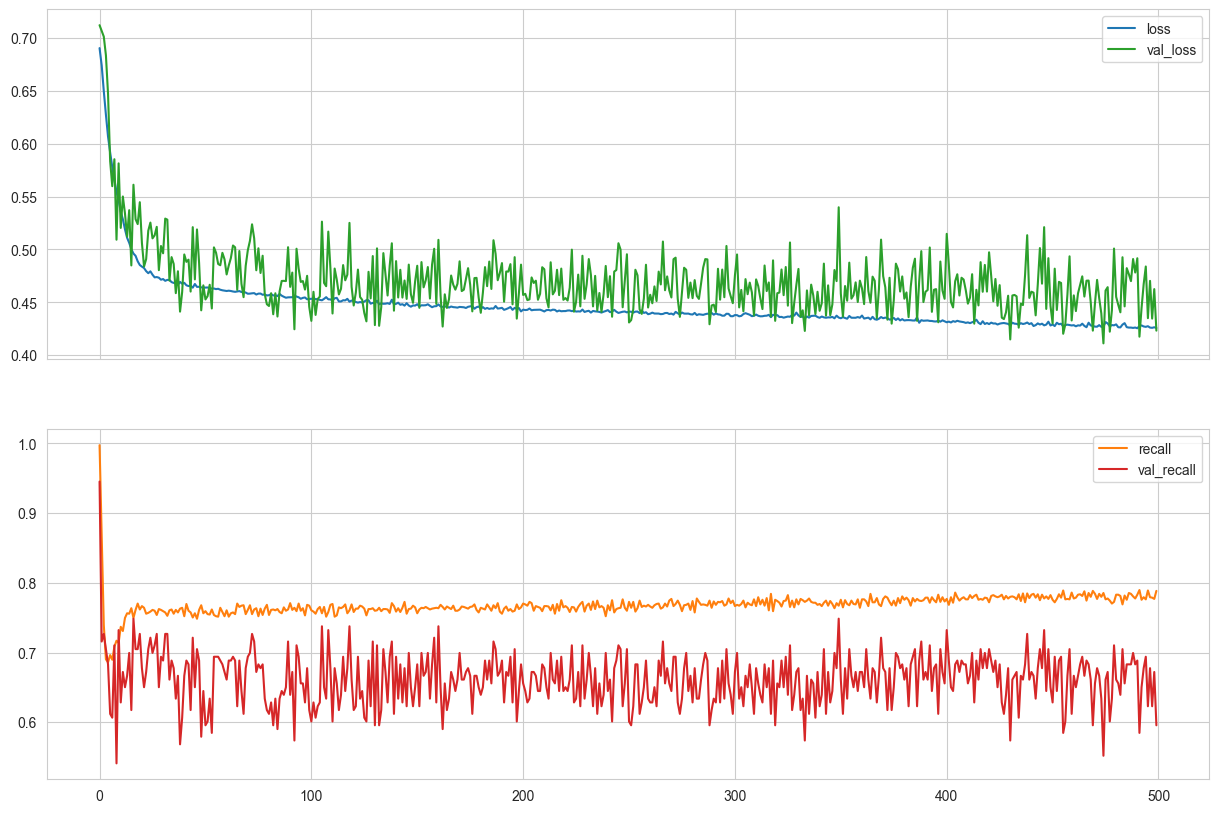

In [52]:
loss_df_balanced.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(15,10))
plt.show()

In [53]:
y_pred = balanced_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 785us/step
[[680 116]
 [ 57 147]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.89       796
           1       0.56      0.72      0.63       204

    accuracy                           0.83      1000
   macro avg       0.74      0.79      0.76      1000
weighted avg       0.85      0.83      0.83      1000



32/32 [==============================] - 0s 890us/step


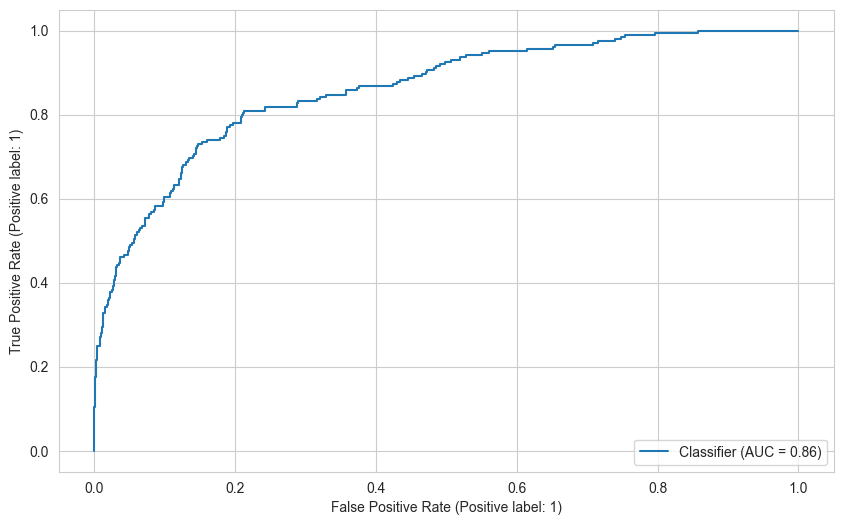

In [54]:
y_pred_proba = balanced_model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [55]:
roc_auc_score(y_test, y_pred_proba)

0.8596782934279239

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [56]:
from tensorflow.keras.optimizers import Adam

In [57]:
tf.keras.utils.set_random_seed(seed)


lr_balanced_model = Sequential()

lr_balanced_model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
lr_balanced_model.add(Dense(9, activation = "relu"))
lr_balanced_model.add(Dense(4, activation = "relu"))
lr_balanced_model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=  0.005)

lr_balanced_model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [58]:
lr_balanced_model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=128,
    epochs=250,
    verbose=1
)

Epoch 1/250
64/64 [==============================] - 1s 3ms/step - loss: 0.6238 - recall: 0.1012 - val_loss: 0.4996 - val_recall: 0.0000e+00
Epoch 2/250
64/64 [==============================] - 0s 1ms/step - loss: 0.4732 - recall: 0.0067 - val_loss: 0.4629 - val_recall: 0.0656
Epoch 3/250
64/64 [==============================] - 0s 1ms/step - loss: 0.4406 - recall: 0.1424 - val_loss: 0.4470 - val_recall: 0.1366
Epoch 4/250
64/64 [==============================] - 0s 1ms/step - loss: 0.4280 - recall: 0.2242 - val_loss: 0.4346 - val_recall: 0.2022
Epoch 5/250
64/64 [==============================] - 0s 1ms/step - loss: 0.4140 - recall: 0.2691 - val_loss: 0.4234 - val_recall: 0.2568
Epoch 6/250
64/64 [==============================] - 0s 1ms/step - loss: 0.3990 - recall: 0.3042 - val_loss: 0.4167 - val_recall: 0.2896
Epoch 7/250
64/64 [==============================] - 0s 1ms/step - loss: 0.3851 - recall: 0.3412 - val_loss: 0.4058 - val_recall: 0.3060
Epoch 8/250
64/64 [==================

64/64 [==============================] - 0s 2ms/step - loss: 0.3235 - recall: 0.5048 - val_loss: 0.3848 - val_recall: 0.3607
Epoch 61/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3232 - recall: 0.4982 - val_loss: 0.3997 - val_recall: 0.3060
Epoch 62/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3250 - recall: 0.4836 - val_loss: 0.3915 - val_recall: 0.3224
Epoch 63/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3245 - recall: 0.4855 - val_loss: 0.3814 - val_recall: 0.4098
Epoch 64/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3228 - recall: 0.4970 - val_loss: 0.3798 - val_recall: 0.3661
Epoch 65/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3238 - recall: 0.4879 - val_loss: 0.3859 - val_recall: 0.4481
Epoch 66/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3240 - recall: 0.4982 - val_loss: 0.3830 - val_recall: 0.4372
Epoch 67/250
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.3191 - recall: 0.4806 - val_loss: 0.3924 - val_recall: 0.4317
Epoch 120/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3209 - recall: 0.5024 - val_loss: 0.3904 - val_recall: 0.3770
Epoch 121/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3184 - recall: 0.4976 - val_loss: 0.3945 - val_recall: 0.3279
Epoch 122/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3165 - recall: 0.4964 - val_loss: 0.3916 - val_recall: 0.3661
Epoch 123/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3182 - recall: 0.5018 - val_loss: 0.3896 - val_recall: 0.4098
Epoch 124/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3187 - recall: 0.5030 - val_loss: 0.3958 - val_recall: 0.3825
Epoch 125/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3192 - recall: 0.4964 - val_loss: 0.3973 - val_recall: 0.3443
Epoch 126/250
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3177 - recall: 0.5103 - val_loss: 0.3980 - val_recall: 0.3607
Epoch 179/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3177 - recall: 0.4964 - val_loss: 0.3998 - val_recall: 0.3388
Epoch 180/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3203 - recall: 0.4818 - val_loss: 0.3973 - val_recall: 0.4754
Epoch 181/250
64/64 [==============================] - 0s 1ms/step - loss: 0.3159 - recall: 0.5018 - val_loss: 0.3975 - val_recall: 0.3661
Epoch 182/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3179 - recall: 0.5073 - val_loss: 0.3921 - val_recall: 0.3880
Epoch 183/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3143 - recall: 0.5018 - val_loss: 0.3971 - val_recall: 0.4536
Epoch 184/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3167 - recall: 0.5067 - val_loss: 0.3845 - val_recall: 0.3880
Epoch 185/250
64/64 [====================

64/64 [==============================] - 0s 4ms/step - loss: 0.3143 - recall: 0.4988 - val_loss: 0.3930 - val_recall: 0.4317
Epoch 238/250
64/64 [==============================] - 0s 4ms/step - loss: 0.3120 - recall: 0.5018 - val_loss: 0.3903 - val_recall: 0.3770
Epoch 239/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3134 - recall: 0.5133 - val_loss: 0.4003 - val_recall: 0.3443
Epoch 240/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3138 - recall: 0.5061 - val_loss: 0.3885 - val_recall: 0.3661
Epoch 241/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3152 - recall: 0.4903 - val_loss: 0.3853 - val_recall: 0.3934
Epoch 242/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3137 - recall: 0.5042 - val_loss: 0.3907 - val_recall: 0.3661
Epoch 243/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3124 - recall: 0.5030 - val_loss: 0.3976 - val_recall: 0.3607
Epoch 244/250
64/64 [====================

**Evaluate model**

In [59]:
loss_lr_balanced = pd.DataFrame(lr_balanced_model.history.history)

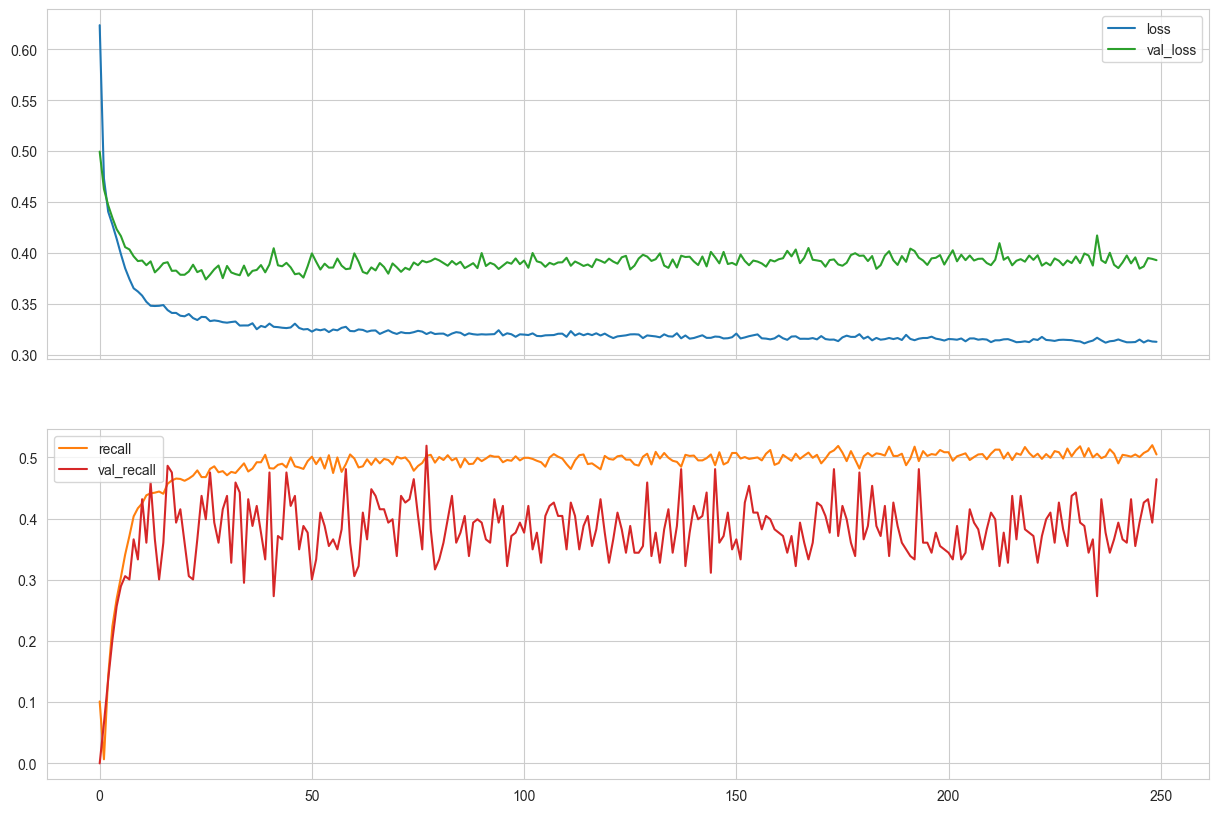

In [60]:
loss_lr_balanced.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(15,10))
plt.show()

In [61]:
y_pred = lr_balanced_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 803us/step
[[736  60]
 [ 93 111]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       796
           1       0.65      0.54      0.59       204

    accuracy                           0.85      1000
   macro avg       0.77      0.73      0.75      1000
weighted avg       0.84      0.85      0.84      1000



### Add Dropout Layer

In [62]:
from tensorflow.keras.layers import Dropout

In [63]:
tf.keras.utils.set_random_seed(seed)

drop_model = Sequential()

drop_model.add(Dense(18, activation="relu", input_dim = X_train.shape[1]))
drop_model.add(Dropout(0.25))

drop_model.add(Dense(9, activation="relu"))
drop_model.add(Dropout(0.25))

drop_model.add(Dense(4, activation="relu"))
drop_model.add(Dropout(0.25))

drop_model.add(Dense(1, activation="sigmoid"))


drop_model.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["Recall"])


In [64]:
drop_model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=128,
    epochs=250,
    verbose=1  
)

Epoch 1/250
64/64 [==============================] - 1s 4ms/step - loss: 0.7088 - recall: 0.5739 - val_loss: 0.6748 - val_recall: 0.0000e+00
Epoch 2/250
64/64 [==============================] - 0s 2ms/step - loss: 0.6653 - recall: 0.0321 - val_loss: 0.6494 - val_recall: 0.0000e+00
Epoch 3/250
64/64 [==============================] - 0s 2ms/step - loss: 0.6320 - recall: 6.0606e-04 - val_loss: 0.6047 - val_recall: 0.0000e+00
Epoch 4/250
64/64 [==============================] - 0s 2ms/step - loss: 0.5740 - recall: 0.0018 - val_loss: 0.5222 - val_recall: 0.0000e+00
Epoch 5/250
64/64 [==============================] - 0s 2ms/step - loss: 0.5399 - recall: 0.0030 - val_loss: 0.5043 - val_recall: 0.0000e+00
Epoch 6/250
64/64 [==============================] - 0s 1ms/step - loss: 0.5278 - recall: 0.0000e+00 - val_loss: 0.4953 - val_recall: 0.0000e+00
Epoch 7/250
64/64 [==============================] - 0s 2ms/step - loss: 0.5246 - recall: 0.0000e+00 - val_loss: 0.4903 - val_recall: 0.0000e+00
E

Epoch 60/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4121 - recall: 0.2455 - val_loss: 0.3915 - val_recall: 0.2459
Epoch 61/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4116 - recall: 0.2667 - val_loss: 0.3958 - val_recall: 0.1913
Epoch 62/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4099 - recall: 0.2527 - val_loss: 0.3919 - val_recall: 0.2404
Epoch 63/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4096 - recall: 0.2618 - val_loss: 0.3911 - val_recall: 0.2514
Epoch 64/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4092 - recall: 0.2715 - val_loss: 0.3915 - val_recall: 0.2514
Epoch 65/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4087 - recall: 0.2552 - val_loss: 0.3907 - val_recall: 0.2295
Epoch 66/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4120 - recall: 0.2576 - val_loss: 0.3911 - val_recall: 0.2459
Epoch 67/250
64/64 [==============

64/64 [==============================] - 0s 2ms/step - loss: 0.3988 - recall: 0.2727 - val_loss: 0.3804 - val_recall: 0.2732
Epoch 120/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4036 - recall: 0.2685 - val_loss: 0.3818 - val_recall: 0.2623
Epoch 121/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4029 - recall: 0.2715 - val_loss: 0.3816 - val_recall: 0.2514
Epoch 122/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3936 - recall: 0.2830 - val_loss: 0.3796 - val_recall: 0.2623
Epoch 123/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3949 - recall: 0.2903 - val_loss: 0.3788 - val_recall: 0.2842
Epoch 124/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3984 - recall: 0.2952 - val_loss: 0.3807 - val_recall: 0.2350
Epoch 125/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3966 - recall: 0.2770 - val_loss: 0.3778 - val_recall: 0.2842
Epoch 126/250
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3965 - recall: 0.3121 - val_loss: 0.3768 - val_recall: 0.2896
Epoch 179/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3945 - recall: 0.3133 - val_loss: 0.3770 - val_recall: 0.2842
Epoch 180/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3949 - recall: 0.2836 - val_loss: 0.3765 - val_recall: 0.2842
Epoch 181/250
64/64 [==============================] - 0s 1ms/step - loss: 0.3913 - recall: 0.3145 - val_loss: 0.3778 - val_recall: 0.2732
Epoch 182/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3924 - recall: 0.3170 - val_loss: 0.3787 - val_recall: 0.2842
Epoch 183/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3917 - recall: 0.3006 - val_loss: 0.3782 - val_recall: 0.2896
Epoch 184/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3942 - recall: 0.3164 - val_loss: 0.3794 - val_recall: 0.2896
Epoch 185/250
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3934 - recall: 0.2976 - val_loss: 0.3745 - val_recall: 0.2732
Epoch 238/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3886 - recall: 0.3273 - val_loss: 0.3724 - val_recall: 0.3060
Epoch 239/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3905 - recall: 0.3206 - val_loss: 0.3718 - val_recall: 0.2842
Epoch 240/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3885 - recall: 0.3297 - val_loss: 0.3747 - val_recall: 0.2732
Epoch 241/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3871 - recall: 0.3382 - val_loss: 0.3762 - val_recall: 0.2732
Epoch 242/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3876 - recall: 0.3291 - val_loss: 0.3712 - val_recall: 0.2951
Epoch 243/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3892 - recall: 0.3491 - val_loss: 0.3757 - val_recall: 0.2678
Epoch 244/250
64/64 [====================

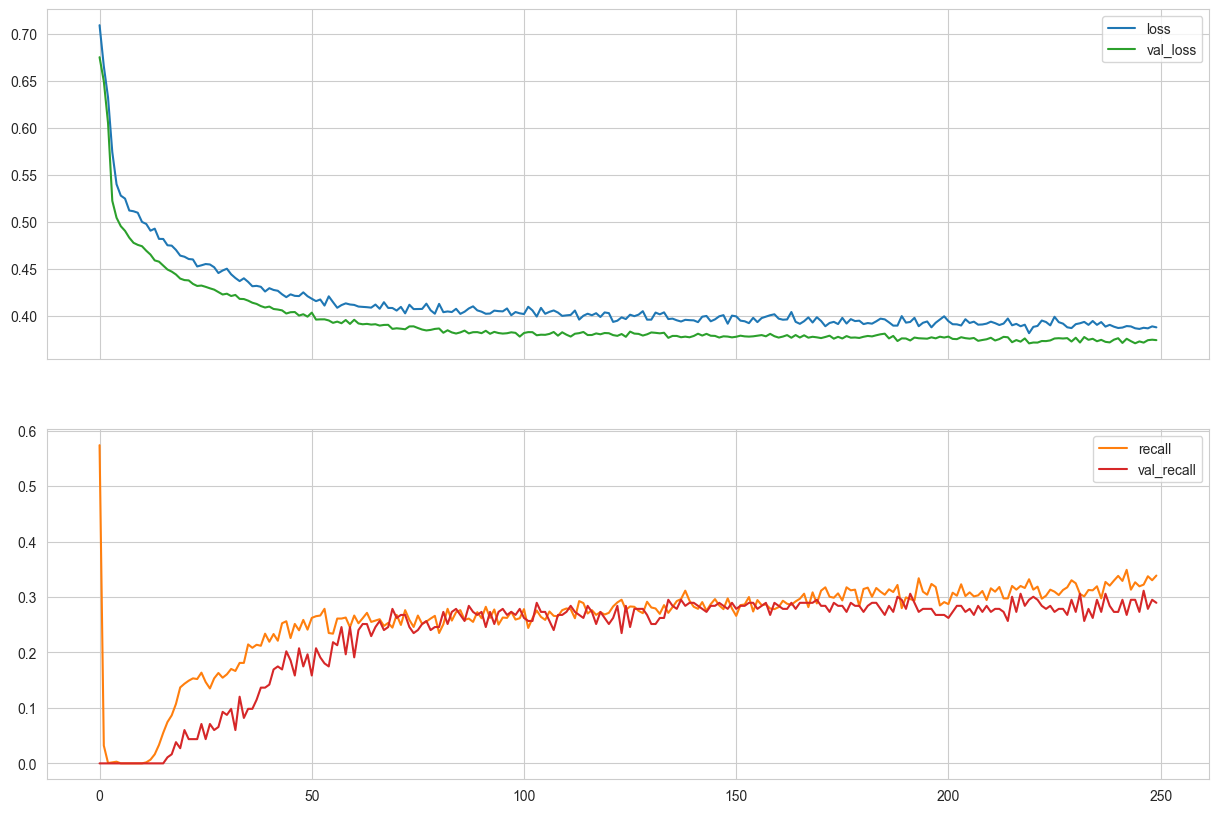

In [65]:
loss_df = pd.DataFrame(drop_model.history.history)
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(15,10))
plt.show()

In [66]:
y_pred = drop_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 663us/step
[[780  16]
 [133  71]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       796
           1       0.82      0.35      0.49       204

    accuracy                           0.85      1000
   macro avg       0.84      0.66      0.70      1000
weighted avg       0.85      0.85      0.83      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [67]:
from tensorflow.keras.callbacks import EarlyStopping

In [68]:
tf.keras.utils.set_random_seed(seed)

early_model = Sequential()

early_model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
early_model.add(Dense(9, activation = "relu"))
early_model.add(Dense(4, activation = "relu"))
early_model.add(Dense(1, activation = "sigmoid"))

early_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])


In [69]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)


In [70]:
early_model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=128,
    epochs=250,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/250
64/64 [==============================] - 1s 4ms/step - loss: 0.6983 - recall: 0.5370 - val_loss: 0.6735 - val_recall: 0.0000e+00
Epoch 2/250
64/64 [==============================] - 0s 1ms/step - loss: 0.6543 - recall: 0.0000e+00 - val_loss: 0.6235 - val_recall: 0.0000e+00
Epoch 3/250
64/64 [==============================] - 0s 1ms/step - loss: 0.5595 - recall: 0.0000e+00 - val_loss: 0.5023 - val_recall: 0.0000e+00
Epoch 4/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4851 - recall: 0.0000e+00 - val_loss: 0.4831 - val_recall: 0.0000e+00
Epoch 5/250
64/64 [==============================] - 0s 1ms/step - loss: 0.4692 - recall: 0.0042 - val_loss: 0.4738 - val_recall: 0.0219
Epoch 6/250
64/64 [==============================] - 0s 1ms/step - loss: 0.4596 - recall: 0.0412 - val_loss: 0.4686 - val_recall: 0.0328
Epoch 7/250
64/64 [==============================] - 0s 1ms/step - loss: 0.4524 - recall: 0.0952 - val_loss: 0.4648 - val_recall: 0.0710
Epoch 8/250
6

64/64 [==============================] - 0s 2ms/step - loss: 0.3405 - recall: 0.4630 - val_loss: 0.3870 - val_recall: 0.3880
Epoch 61/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3394 - recall: 0.4594 - val_loss: 0.3866 - val_recall: 0.3552
Epoch 62/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3397 - recall: 0.4515 - val_loss: 0.3873 - val_recall: 0.3770
Epoch 63/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3393 - recall: 0.4521 - val_loss: 0.3853 - val_recall: 0.3825
Epoch 64/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3383 - recall: 0.4612 - val_loss: 0.3838 - val_recall: 0.3880
Epoch 65/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3380 - recall: 0.4545 - val_loss: 0.3838 - val_recall: 0.4098
Epoch 66/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3380 - recall: 0.4703 - val_loss: 0.3870 - val_recall: 0.3607
Epoch 67/250
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.3261 - recall: 0.4952 - val_loss: 0.3767 - val_recall: 0.4754
Epoch 120/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3268 - recall: 0.5121 - val_loss: 0.3760 - val_recall: 0.3825
Epoch 121/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3269 - recall: 0.5024 - val_loss: 0.3815 - val_recall: 0.3497
Epoch 122/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3264 - recall: 0.5042 - val_loss: 0.3814 - val_recall: 0.3497
Epoch 123/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3255 - recall: 0.5000 - val_loss: 0.3764 - val_recall: 0.4153
Epoch 124/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3260 - recall: 0.5024 - val_loss: 0.3766 - val_recall: 0.3716
Epoch 125/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3259 - recall: 0.5067 - val_loss: 0.3786 - val_recall: 0.3607
Epoch 126/250
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3225 - recall: 0.5073 - val_loss: 0.3731 - val_recall: 0.4098
Epoch 179/250
64/64 [==============================] - 0s 1ms/step - loss: 0.3243 - recall: 0.5012 - val_loss: 0.3696 - val_recall: 0.4262
Epoch 180/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3249 - recall: 0.5000 - val_loss: 0.3744 - val_recall: 0.4153
Epoch 181/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3230 - recall: 0.5085 - val_loss: 0.3768 - val_recall: 0.3497
Epoch 182/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3238 - recall: 0.5097 - val_loss: 0.3742 - val_recall: 0.3825
Epoch 183/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3228 - recall: 0.5030 - val_loss: 0.3698 - val_recall: 0.4317
Epoch 184/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3235 - recall: 0.5115 - val_loss: 0.3732 - val_recall: 0.4098
Epoch 185/250
64/64 [====================

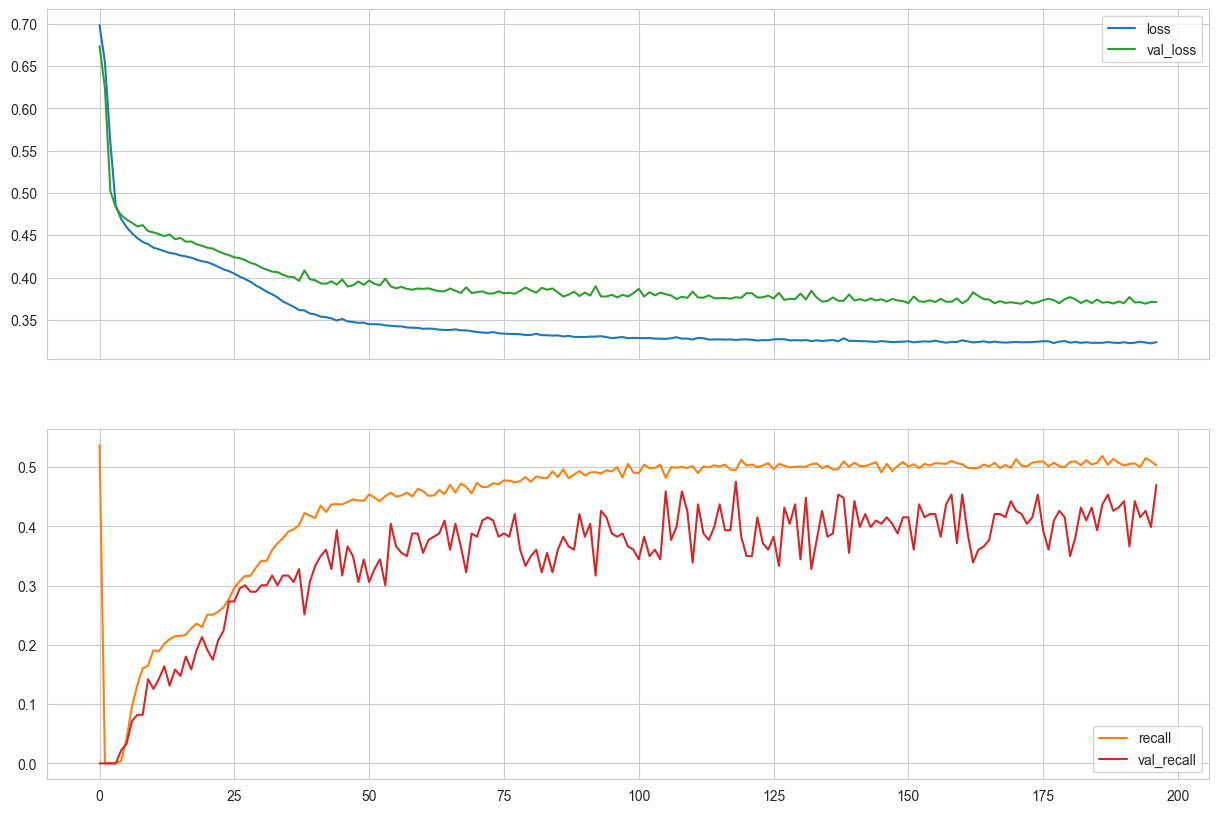

In [71]:
loss_df = pd.DataFrame(early_model.history.history)
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(15,10))
plt.show()

In [72]:
y_pred = early_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 654us/step
[[763  33]
 [106  98]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.75      0.48      0.59       204

    accuracy                           0.86      1000
   macro avg       0.81      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



#### Monitor the "val_recall" as metric

In [73]:
tf.keras.utils.set_random_seed(seed)

early_model = Sequential()

early_model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
early_model.add(Dense(9, activation = "relu"))
early_model.add(Dense(4, activation = "relu"))
early_model.add(Dense(1, activation = "sigmoid"))

early_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])


In [74]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 50, restore_best_weights = True)

In [75]:
early_model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=128,
    epochs=250,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/250
64/64 [==============================] - 1s 4ms/step - loss: 0.6983 - recall: 0.5370 - val_loss: 0.6735 - val_recall: 0.0000e+00
Epoch 2/250
64/64 [==============================] - 0s 2ms/step - loss: 0.6543 - recall: 0.0000e+00 - val_loss: 0.6235 - val_recall: 0.0000e+00
Epoch 3/250
64/64 [==============================] - 0s 2ms/step - loss: 0.5595 - recall: 0.0000e+00 - val_loss: 0.5023 - val_recall: 0.0000e+00
Epoch 4/250
64/64 [==============================] - 0s 1ms/step - loss: 0.4851 - recall: 0.0000e+00 - val_loss: 0.4831 - val_recall: 0.0000e+00
Epoch 5/250
64/64 [==============================] - 0s 1ms/step - loss: 0.4692 - recall: 0.0042 - val_loss: 0.4738 - val_recall: 0.0219
Epoch 6/250
64/64 [==============================] - 0s 1ms/step - loss: 0.4596 - recall: 0.0412 - val_loss: 0.4686 - val_recall: 0.0328
Epoch 7/250
64/64 [==============================] - 0s 1ms/step - loss: 0.4524 - recall: 0.0952 - val_loss: 0.4648 - val_recall: 0.0710
Epoch 8/250
6

64/64 [==============================] - 0s 2ms/step - loss: 0.3405 - recall: 0.4630 - val_loss: 0.3870 - val_recall: 0.3880
Epoch 61/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3394 - recall: 0.4594 - val_loss: 0.3866 - val_recall: 0.3552
Epoch 62/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3397 - recall: 0.4515 - val_loss: 0.3873 - val_recall: 0.3770
Epoch 63/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3393 - recall: 0.4521 - val_loss: 0.3853 - val_recall: 0.3825
Epoch 64/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3383 - recall: 0.4612 - val_loss: 0.3838 - val_recall: 0.3880
Epoch 65/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3380 - recall: 0.4545 - val_loss: 0.3838 - val_recall: 0.4098
Epoch 66/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3380 - recall: 0.4703 - val_loss: 0.3870 - val_recall: 0.3607
Epoch 67/250
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.3261 - recall: 0.4952 - val_loss: 0.3767 - val_recall: 0.4754
Epoch 120/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3268 - recall: 0.5121 - val_loss: 0.3760 - val_recall: 0.3825
Epoch 121/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3269 - recall: 0.5024 - val_loss: 0.3815 - val_recall: 0.3497
Epoch 122/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3264 - recall: 0.5042 - val_loss: 0.3814 - val_recall: 0.3497
Epoch 123/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3255 - recall: 0.5000 - val_loss: 0.3764 - val_recall: 0.4153
Epoch 124/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3260 - recall: 0.5024 - val_loss: 0.3766 - val_recall: 0.3716
Epoch 125/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3259 - recall: 0.5067 - val_loss: 0.3786 - val_recall: 0.3607
Epoch 126/250
64/64 [====================

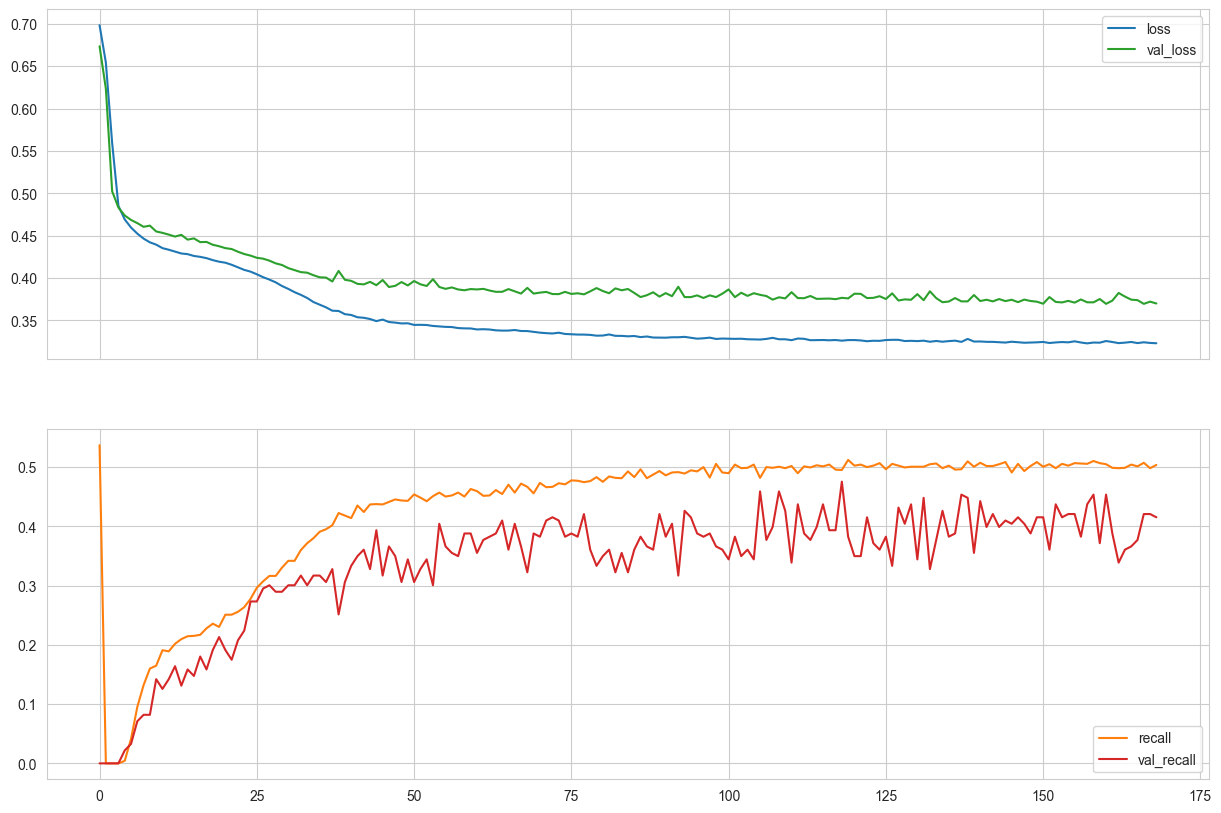

In [76]:
loss_df = pd.DataFrame(early_model.history.history)
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(15,10))
plt.show()

In [77]:
y_pred = early_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 852us/step
[[744  52]
 [ 96 108]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       796
           1       0.68      0.53      0.59       204

    accuracy                           0.85      1000
   macro avg       0.78      0.73      0.75      1000
weighted avg       0.84      0.85      0.85      1000



## Optuna

In [78]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [79]:
import optuna

In [80]:
from tensorflow.keras.regularizers import l1, l2, L1L2

In [81]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 25, restore_best_weights = True)

In [82]:
trial_metric = "Recall"
batch_size = 128


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 18, 36) 
    n_units2 = trial.suggest_int("n_units2", 18, 36)  
    n_units3 = trial.suggest_int("n_units3", 18, 36)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam]) # optimizer olarak buradakileri dene
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1) 
    regularizer1 = trial.suggest_loguniform("regularizer1", 1e-5, 1e-3)
    regularizer2 = trial.suggest_loguniform("regularizer2", 1e-5, 1e-3)
    dropout = trial.suggest_categorical("dropout",[0, .3, .5])
    
    # deneyeceğimiz hyperparametrelerin uzayını belirledik.
    # modeli aynı seed'de çalıştırarak

    tf.keras.utils.set_random_seed(seed)
    model = Sequential()
    model.add(Dense(n_units1,  
                    activation="relu", 
                    input_dim=X_train.shape[1],))
    model.add(Dropout(dropout))
    model.add(Dense(n_units2, 
                    activation="relu"))
    model.add(Dropout(dropout))
    model.add(Dense(n_units3,
                    activation="relu"))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation="sigmoid"))
   


    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric]
    )
    
    
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 2) # mimarinin içerisinde direk veremediğimiz bir hyperparametre-->(class_weight)
    w1 = trial.suggest_loguniform("w1", 0.01, 5) # daha var, bunu fit içerisinde belirtebiliyoruz ondan dolayı burada tanımladık
                                                 # denenmesi için.
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=500,
        callbacks=[early_stop],
        class_weight={0 :w0, 1:w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    if score > 0.85: # When the scores of any class are poor, this threshold can be increased or decreased
        score = score * 0
    return score

In [83]:
study = optuna.create_study(direction="maximize") # trial_metric = "Accuracy" olduğundan bunu maximize etmek istiyoruz.
study.optimize(objective, n_trials=15) # 15 trials denenecek istersek daha fazla da yazabiliriz.optimize edeceği :def objective
display(study.best_params)

[I 2023-05-17 22:06:07,196] A new study created in memory with name: no-name-86d683f6-50e2-48e7-85ad-fa52cfbedb19


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 22:06:11,717] Trial 0 finished with value: 0.0 and parameters: {'n_units1': 35, 'n_units2': 19, 'n_units3': 30, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.0004973343224837191, 'regularizer1': 4.6098526726063487e-05, 'regularizer2': 1.6664694472934117e-05, 'dropout': 0.5, 'w0': 0.08031961490861983, 'w1': 4.872587211557682}. Best is trial 0 with value: 0.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 22:06:15,852] Trial 1 finished with value: 0.0 and parameters: {'n_units1': 34, 'n_units2': 25, 'n_units3': 22, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 4.215534886751617e-05, 'regularizer1': 0.0008822593028026342, 'regularizer2': 1.362938765826594e-05, 'dropout': 0.3, 'w0': 0.024767299698703622, 'w1': 0.01171575464397981}. Best is trial 0 with value: 0.0.


Restoring model weights from the end of the best epoch: 8.
Epoch 33: early stopping


[I 2023-05-17 22:06:19,447] Trial 2 finished with value: 0.38235294818878174 and parameters: {'n_units1': 30, 'n_units2': 31, 'n_units3': 32, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.047010129800695175, 'regularizer1': 1.450710121718114e-05, 'regularizer2': 0.00011922105116165425, 'dropout': 0, 'w0': 0.036974852691562074, 'w1': 0.02107193305982215}. Best is trial 2 with value: 0.38235294818878174.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 22:06:23,326] Trial 3 finished with value: 0.0 and parameters: {'n_units1': 28, 'n_units2': 27, 'n_units3': 34, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0003874947022055307, 'regularizer1': 1.0138774076903366e-05, 'regularizer2': 2.2357004643618707e-05, 'dropout': 0.5, 'w0': 0.3335839024733935, 'w1': 0.04097773781782226}. Best is trial 2 with value: 0.38235294818878174.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 22:06:26,810] Trial 4 finished with value: 0.0 and parameters: {'n_units1': 29, 'n_units2': 18, 'n_units3': 18, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.009948240220136538, 'regularizer1': 5.085160146244252e-05, 'regularizer2': 0.00014144732098976797, 'dropout': 0, 'w0': 0.14874048829217676, 'w1': 0.0677616127736805}. Best is trial 2 with value: 0.38235294818878174.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 22:06:29,858] Trial 5 finished with value: 0.0 and parameters: {'n_units1': 26, 'n_units2': 21, 'n_units3': 36, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0006198115815531821, 'regularizer1': 0.00011028899433648576, 'regularizer2': 0.00013267705023017944, 'dropout': 0, 'w0': 0.08637510214328899, 'w1': 1.24267609572224}. Best is trial 2 with value: 0.38235294818878174.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 22:06:33,884] Trial 6 finished with value: 0.0 and parameters: {'n_units1': 20, 'n_units2': 20, 'n_units3': 21, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.0013201521851781957, 'regularizer1': 0.0008436771691086338, 'regularizer2': 3.806203756220725e-05, 'dropout': 0.5, 'w0': 0.028594810528242944, 'w1': 0.017069706900938154}. Best is trial 2 with value: 0.38235294818878174.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 22:06:37,483] Trial 7 finished with value: 0.6274510025978088 and parameters: {'n_units1': 34, 'n_units2': 36, 'n_units3': 36, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 7.747746373563022e-05, 'regularizer1': 1.1612432486231249e-05, 'regularizer2': 0.00014972990661584455, 'dropout': 0.5, 'w0': 1.351071809087632, 'w1': 1.97123241583273}. Best is trial 7 with value: 0.6274510025978088.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 22:06:40,936] Trial 8 finished with value: 0.0 and parameters: {'n_units1': 30, 'n_units2': 28, 'n_units3': 32, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.00016146409559348487, 'regularizer1': 0.00019273694766853953, 'regularizer2': 0.00014182466670377073, 'dropout': 0.5, 'w0': 0.0612255418989588, 'w1': 1.409897263161958}. Best is trial 7 with value: 0.6274510025978088.


Restoring model weights from the end of the best epoch: 15.
Epoch 40: early stopping


[I 2023-05-17 22:06:46,680] Trial 9 finished with value: 0.0 and parameters: {'n_units1': 28, 'n_units2': 25, 'n_units3': 31, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.015531343070231162, 'regularizer1': 0.0006408910691883166, 'regularizer2': 0.00022504395595446234, 'dropout': 0.5, 'w0': 0.2292751807258586, 'w1': 3.5002464347938154}. Best is trial 7 with value: 0.6274510025978088.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 22:06:50,588] Trial 10 finished with value: 0.0 and parameters: {'n_units1': 21, 'n_units2': 35, 'n_units3': 26, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 1.8297703675001417e-05, 'regularizer1': 2.1670325181645514e-05, 'regularizer2': 0.0007734701250769506, 'dropout': 0.3, 'w0': 1.9684777271245206, 'w1': 0.23942795676169049}. Best is trial 7 with value: 0.6274510025978088.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 22:06:53,634] Trial 11 finished with value: 0.0 and parameters: {'n_units1': 32, 'n_units2': 35, 'n_units3': 36, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.08176041045123571, 'regularizer1': 1.1114723791687669e-05, 'regularizer2': 5.382887147920142e-05, 'dropout': 0, 'w0': 0.010979537881876845, 'w1': 0.2752437416315976}. Best is trial 7 with value: 0.6274510025978088.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 22:06:57,251] Trial 12 finished with value: 0.0 and parameters: {'n_units1': 36, 'n_units2': 32, 'n_units3': 27, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 1.1988155043430386e-05, 'regularizer1': 2.2174159345476587e-05, 'regularizer2': 0.0003283395888719221, 'dropout': 0, 'w0': 1.9783585424127357, 'w1': 0.09289381809964767}. Best is trial 7 with value: 0.6274510025978088.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 22:07:00,865] Trial 13 finished with value: 0.12745098769664764 and parameters: {'n_units1': 24, 'n_units2': 32, 'n_units3': 33, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 7.539459915355738e-05, 'regularizer1': 2.051688419773031e-05, 'regularizer2': 6.4900742586249e-05, 'dropout': 0, 'w0': 0.48615985939590806, 'w1': 0.5039007906555985}. Best is trial 7 with value: 0.6274510025978088.


Restoring model weights from the end of the best epoch: 43.
Epoch 68: early stopping


[I 2023-05-17 22:07:09,195] Trial 14 finished with value: 0.2598039209842682 and parameters: {'n_units1': 32, 'n_units2': 32, 'n_units3': 29, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.003469975888435242, 'regularizer1': 1.0439290788851426e-05, 'regularizer2': 7.453919647810603e-05, 'dropout': 0.3, 'w0': 0.7229256385682901, 'w1': 0.11730436576928507}. Best is trial 7 with value: 0.6274510025978088.


{'n_units1': 34,
 'n_units2': 36,
 'n_units3': 36,
 'optimizer': keras.optimizers.rmsprop.RMSprop,
 'learning_rate': 7.747746373563022e-05,
 'regularizer1': 1.1612432486231249e-05,
 'regularizer2': 0.00014972990661584455,
 'dropout': 0.5,
 'w0': 1.351071809087632,
 'w1': 1.97123241583273}

In [84]:
# build model with optuna parameters
unit1, unit2, unit3, optimizer, lr, lreg1, lreg2, dropout_rate, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["regularizer1"],
    study.best_params["regularizer2"],
    study.best_params["dropout"],
    study.best_params["w0"],
    study.best_params["w1"],
)

tf.keras.utils.set_random_seed(seed)
opt_model = Sequential()
opt_model.add(Dense(unit1, 
                activation="relu" 
                ))
opt_model.add(Dropout(dropout_rate))
opt_model.add(Dense(unit2, 
                activation="relu"))
opt_model.add(Dropout(dropout_rate))
opt_model.add(Dense(unit3, 
                activation="relu"))
opt_model.add(Dropout(dropout_rate))
opt_model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
opt_model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
opt_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=128,
    epochs=250,
    callbacks=[early_stop],
    verbose=1, class_weight={0: w0, 1:w1})

Epoch 1/250
64/64 [==============================] - 1s 4ms/step - loss: 1.1259 - recall: 0.6291 - val_loss: 0.7063 - val_recall: 0.5792
Epoch 2/250
64/64 [==============================] - 0s 2ms/step - loss: 1.0479 - recall: 0.4982 - val_loss: 0.6623 - val_recall: 0.1257
Epoch 3/250
64/64 [==============================] - 0s 2ms/step - loss: 1.0041 - recall: 0.3527 - val_loss: 0.6270 - val_recall: 0.0000e+00
Epoch 4/250
64/64 [==============================] - 0s 2ms/step - loss: 0.9774 - recall: 0.2297 - val_loss: 0.5985 - val_recall: 0.0000e+00
Epoch 5/250
64/64 [==============================] - 0s 2ms/step - loss: 0.9485 - recall: 0.1533 - val_loss: 0.5753 - val_recall: 0.0000e+00
Epoch 6/250
64/64 [==============================] - 0s 2ms/step - loss: 0.9319 - recall: 0.0939 - val_loss: 0.5596 - val_recall: 0.0000e+00
Epoch 7/250
64/64 [==============================] - 0s 2ms/step - loss: 0.9170 - recall: 0.0709 - val_loss: 0.5474 - val_recall: 0.0000e+00
Epoch 8/250
64/64 [==

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [85]:
history = opt_model.history.history

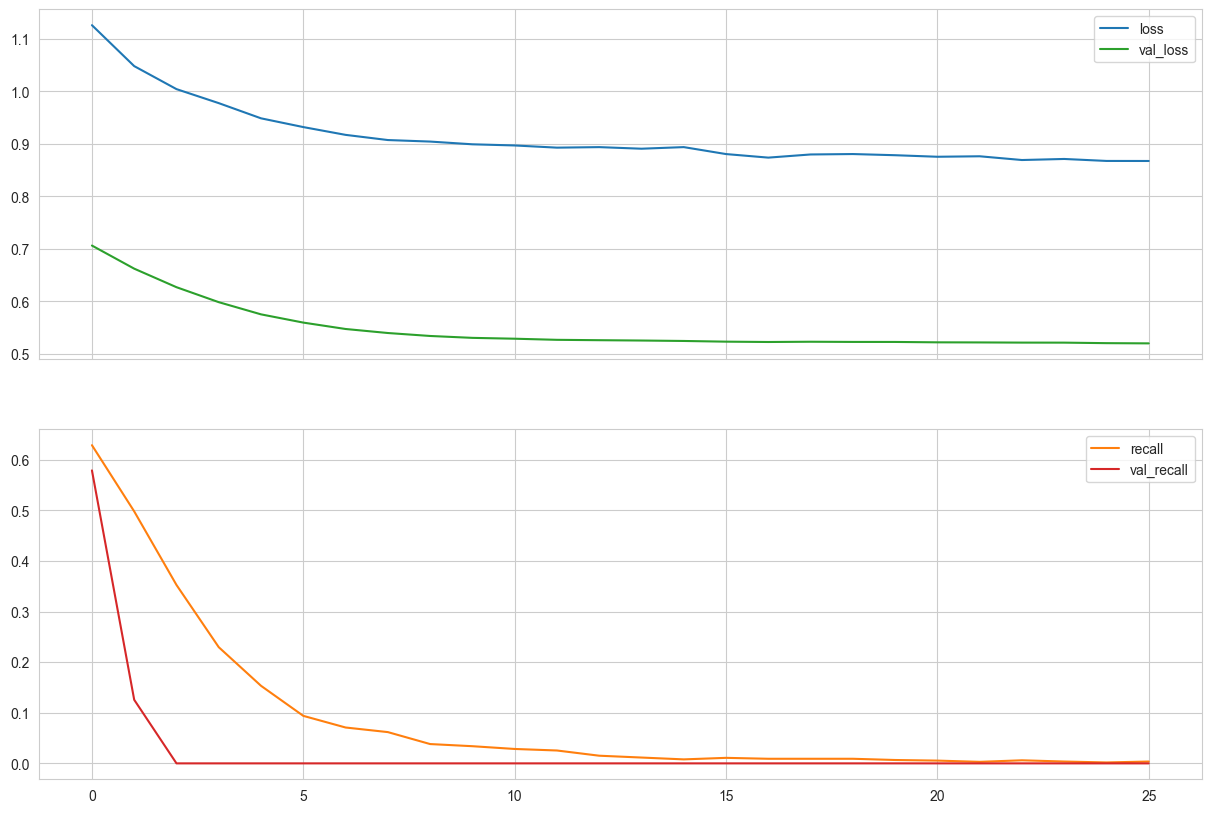

In [86]:
loss_df = pd.DataFrame(history)
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(15,10))
plt.show()

In [87]:
y_pred = (opt_model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 812us/step
[[314 482]
 [ 76 128]]
              precision    recall  f1-score   support

           0       0.81      0.39      0.53       796
           1       0.21      0.63      0.31       204

    accuracy                           0.44      1000
   macro avg       0.51      0.51      0.42      1000
weighted avg       0.68      0.44      0.49      1000



32/32 [==============================] - 0s 955us/step


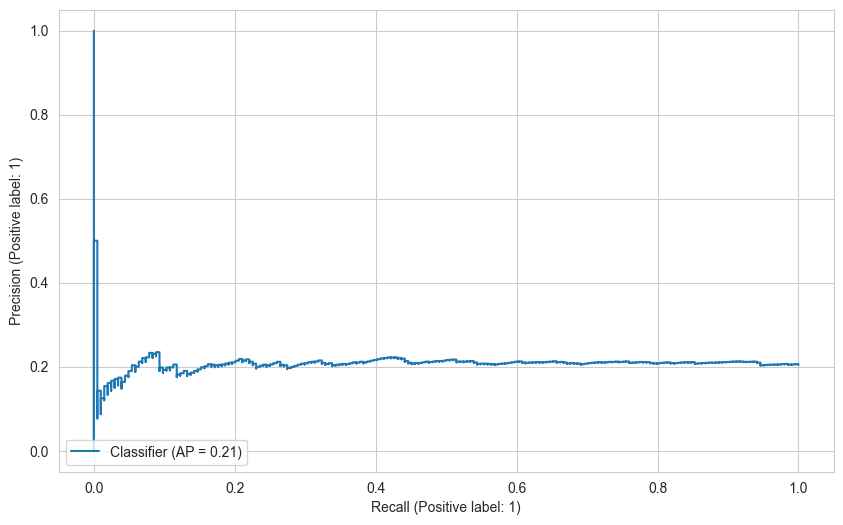

In [88]:
from sklearn.metrics import PrecisionRecallDisplay,precision_recall_curve

y_pred_proba = opt_model.predict(X_test)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba);

# Final Model and Model Deployment

In [89]:
import pickle

pickle.dump(scaler, open("scaler_bank_churn", 'wb'))


In [90]:
y_pred = balanced_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 717us/step
[[680 116]
 [ 57 147]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.89       796
           1       0.56      0.72      0.63       204

    accuracy                           0.83      1000
   macro avg       0.74      0.79      0.76      1000
weighted avg       0.85      0.83      0.83      1000



In [91]:
balanced_model.save('model_bank_churn.h5')

## Prediction

In [92]:
# load model
from tensorflow.keras.models import load_model

In [93]:
model_churn = load_model('model_bank_churn.h5')

scaler_churn = pickle.load(open("scaler_bank_churn", "rb"))

In [94]:
single_customer = df.drop('Exited', axis = 1).iloc[0:1, :]
single_customer


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,2,0,42,2,0.000,1,1,1,101348.880


In [95]:
single_customer = scaler_churn.transform(single_customer)
single_customer

array([[0.538     , 0.5       , 0.        , 0.32432432, 0.2       ,
        0.        , 0.        , 1.        , 1.        , 0.50654122]])

In [96]:
(model_churn.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 50ms/step


array([[1]], dtype=int32)

In [97]:
df["Exited"].iloc[0]

1

## Comparison with ML

In [98]:
X_train, X_test, y_train, y_test = train_test_split( X, y, stratify=y, test_size=0.1, random_state=seed)

**Logistic regression**

In [99]:
from sklearn.linear_model import LogisticRegression

class_weights = {0: 1.0, 1: 10.0}  # Define class weights based on the imbalance

log_model = LogisticRegression(class_weight=sklearn_weights)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[514 282]
 [ 68 136]]
              precision    recall  f1-score   support

           0       0.88      0.65      0.75       796
           1       0.33      0.67      0.44       204

    accuracy                           0.65      1000
   macro avg       0.60      0.66      0.59      1000
weighted avg       0.77      0.65      0.68      1000



**Random Forest**

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
rf_model = RandomForestClassifier(class_weight=sklearn_weights)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[764  32]
 [119  85]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.73      0.42      0.53       204

    accuracy                           0.85      1000
   macro avg       0.80      0.69      0.72      1000
weighted avg       0.84      0.85      0.83      1000



**Catboost**

In [102]:
#!pip install catboost


In [ ]:
from catboost import CatBoostClassifier

# Train the CatBoostClassifier model with early stopping
cat_model = CatBoostClassifier(iterations=1000, early_stopping_rounds=10, random_state=seed, class_weight=sklearn_weights,
                               learning_rate = 0.1, eval_metric='Recall', use_best_model=True)
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test))

# Use the trained model to make predictions on the test set
y_pred = cat_model.predict(X_test)

# Print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Use the trained model to make predictions on the test set
y_pred_train = cat_model.predict(X_train)

# Print the confusion matrix and classification report
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___